<center><h1>Statistics for Machine Learning #1</h1></center>
&nbsp;
<center><h2>Estimating Population Parameters</h2></center>

### Overview

This notebook aims to give an intuitive overview of common population parameters in statistics, including the: mean, variance and standard deviation. This is done by giving the formula for each, but also the motivation behind why each measure is useful, and how the formulae were derived. Further explanations of histograms, distributions, the difference between populations and samples, Bessel's correction and more are also given.

The dataset used to illustrate these explanations is the SOCR Height and Weight dataset from Kaggle [1]. Vanilla Python has been used to implement the fundamental equations, so that the mathematics is not obscured behind 3rd party libraries. Matplotlib and NumPy have been used to perform the plotting.

### Topics Covered

* Histograms

* Distributions

* Mean

* Variance

* Standard Deviation

* Normal Distribution Equation

* Bessel's Correction

* Population Parameters vs Sample Estimates


### Contents

Section 1 - Histograms and Distributions

Section 2 - Calculating Population Parameters

Section ? - Conclusion

Section ? - References

<center><h2>Section 1 - Histograms and Distributions</h2></center>

### 1.1 - Loading the Data

To show the theory applied to real data, a dataset containing the heights and weights of 25,000 18 year olds has been used. For the purposes of this notebook, the 25,000 person dataset is considered to be an entire population. The difference between a population and a sample will be explained in a later section. 

In [ ]:
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [121]:
df = pd.read_csv('SOCR-HeightWeight.csv', sep=',')
heights = df['Height(Inches)']
weights = df['Weight(Pounds)']

print(f'Number of rows: {len(df)}')

Number of rows: 25000


### 1.2 - What is a Distribution?

The heights and weights of the individuals can be plot using histograms. This is a basic plot which groups data into **bins**. Each bin is a portion of the $x$ axis, for example this could be the region between $x$ = 50 and $x$ = 55. The plot will count all the data points that are between 50 and 55, then draw a bar showing how many points were counted. In these examples, the $x$-axis represents the height and weight of a person respectively. Plotting data in this way gives a way to visualise how common certain values are in a dataset. For example, if the bar for 67-68 inches is the tallest on the heights histogram, we know that the most common height is between 67 and 68 inches.

But why use bins and not simply plot bar for exact values? The reason for this is that measurements rarely have the exact same value. Since height and weight measurements are continuous (they can take any decimal value of inches if your ruler is good enough), then its most likely that every value will be unique. So if you plot these, the count for each value with be one. By grouping the data into bins, its gives a good idea about how the data is spread out in the data set.

In this example, a bin size of 150 bins was used. This can take some trial and error in order to get a good view of the data.

Text(0, 0.5, 'Frequency')

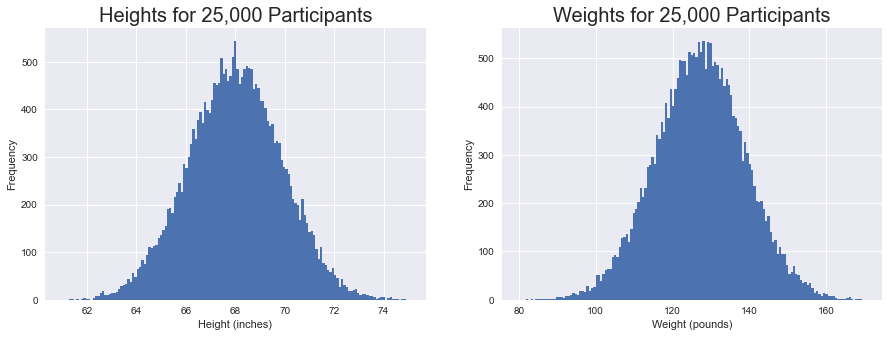

In [321]:
plt.style.use('seaborn')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax[0].set_title('Heights for 25,000 Participants', fontsize=20)
ax[0].hist(heights, bins=np.linspace(61,75,150))
ax[0].set_xlabel('Height (inches)')
ax[0].set_ylabel('Frequency')

ax[1].set_title('Weights for 25,000 Participants', fontsize=20)
ax[1].hist(weights, bins=np.linspace(80,170,150))
ax[1].set_xlabel('Weight (pounds)')
ax[1].set_ylabel('Frequency')


### 1.3 - Normal Distributions

The distributions above look very similar, taking a 'bell-curve' shape. This shows most of the data concentrated in the middle of the graphs, so most people's height and weight are around the average, and then there are a few people who are much below or much above average. This distribution is very common in statistics, and is called the **Normal Distribution**. It is also sometimes called the **Gaussian Distribution** after Carl Gauss, a German mathematician who developed the theory behind it. Normal distributions are very common in nature, and include everything from IQ, to shoe size, and many other observations.

Since this distribution is so common, a mathematical equation to model the curve has been developed by mathematicians. This will be shown in the next section.

### 1.4 - Finding Probabilities from Histograms

Histograms can be used to find the probabilty of making an observation within a range of values. For example, if a height was randomly picked from the dataset, we can find the probability it is between 68 and 69 inches by:

&nbsp;

$
P(\text{height is between 68 and 69}) = \frac{\text{number of heights in 68-69 bin}}{\text{total number of heights}}
$

&nbsp;

Since in the plots above we used bin sizes of 150, there was a bin every 0.1 inches in height. For this example, to keep things simple there will be only 15 bins - one for every inch. Now it is easy to pick out the bin representing the heights between 68 and 69.

Probability height is between 68 and 69 inches: 0.20 (20%)


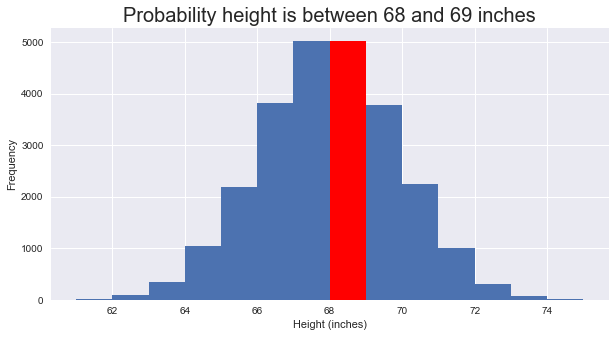

In [320]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title('Probability height is between 68 and 69 inches', fontsize=20)
ax.set_xlabel('Height (inches)')
ax.set_ylabel('Frequency')

N, bins, patches = ax.hist(heights, bins=np.linspace(61,75,15))
patches[7].set_facecolor('r')

num_heights_in_bin = patches[7].get_height()
total_num_heights = len(heights)
probability = num_heights_in_bin/total_num_heights

print(f'Probability height is between 68 and 69 inches: {probability:.2f} ({int(probability*100)}%)')

Simiarly, we can find the probability that a height will be under a certain value, e.g. 70, by finding:

&nbsp;

$
P(\text{height is below 70}) = \frac{\text{number of heights in bins below 70}}{\text{total number of heights}}
$

Probability height is below 70 inches: 0.85 (85%)


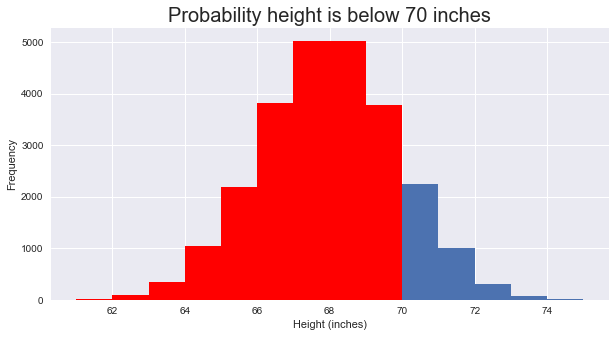

In [322]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title('Probability height is below 70 inches', fontsize=20)
ax.set_xlabel('Height (inches)')
ax.set_ylabel('Frequency')

N, bins, patches = ax.hist(heights, bins=np.linspace(61,75,15))

for bin_num in range(9):
    patches[bin_num].set_facecolor('r')

num_heights_in_bins = sum([patches[bin_num].get_height() for bin_num in range(9)])
total_num_heights = len(heights)
probability = num_heights_in_bins/total_num_heights

print(f'Probability height is below 70 inches: {probability:.2f} ({int(probability*100)}%)')

<center><h2>Section 2 - Calculating Population Parameters</h2></center>

### 2.1 - What are Population Parameters?

As mentioned briefly in Section 1, the data here is being treated as an entire population. That means that when we find the average height of the 25,000 people, we are saying this is the true average height for an 18 year old. In Section 3, we will consider a small portion of the dataset (called a **sample**) and will use this to try to estimate the average of the entire dataset.

Population parameters are the measures that give us descriptions of the data, including: which values are most common and how the data is spread. This is useful, since we can use a few numbers to summarise entire datasets.

### 2.2 - Calculating the Population Mean

The population mean is the average height and weight for the entire dataset. Since we know all the heights and weights for this group, we can find an answer for the true mean of this population. This is as opposed to if we only knew a sample of the heights and weights, in which case we could only make an estimation of the mean.

In statistics, the mean of an entire population is denoted by $μ$, and is defined as:

$
μ = \frac{\sum  \limits _{i=1}^{N} x_i}{N}
$

where N is the size of the population.

In [165]:
def mean(values):
    return sum(values)/len(values)
    
mu_heights = mean(heights)
mu_weights = mean(weights)

print(f'Average population height: {mu_heights:.2f} inches')
print(f'Average population weight: {mu_weights:.2f} pounds')

Average population height: 67.99 inches
Average population weight: 127.08 pounds


### 2.3 - Calculating the Population Variance

The variance gives a measure for the 'spread' of the data, and is found by calculating the average 'squared difference' between each of the data points and the mean. The formula for variance is given as:

$
Var(x) = \frac{\sum  \limits _{i=1}^{N} (x_i - \mu)^2}{N}
$


In [163]:
def variance(values):
    mu = mean(values)
    N = len(values)
    return sum([(x-mu)**2 for x in values]) / N

var_heights = variance(heights)
var_weights = variance(weights)

print(f'Variance of population height: {var_heights:.2f} inches^2')
print(f'Variance of population weight: {var_weights:.2f} pounds^2')

Variance of population height: 3.62 inches^2
Variance of population weight: 135.97 pounds^2


### 2.4 - Understanding the Variance
To break down the reasoning behind this formula, its important to understand what the variance is trying to describe. The variance is a measure of the spread of data, that is, how much the data as a whole is distributed about the mean. A variance of 0 means that all the data points are equal to the mean, and so there is 0 spread in the dataset. The greater the value of the variance, the greater the average distance a data point is from the mean of the dataset. There is no maximum value the variance can take, however a negative is not possible since you cannot have a negative distance (since all the distances are squared).

This explains why it is useful to have an average of the difference between each point and the mean. The only part left unexplained is why the difference is squared. The answer is that it doesn't have to be! It was decided by mathematicians that squaring the differences was the best action to take, since this would make each distance positive, and prevents negative differences cancelling out positive ones. But this could have been accomplished with taking the absolute difference between each point and the mean. There are a few benefits to squaring the differences however, one of which includes the fact defining the variance in this way means that it is continuously differentiable. This is not the case when taking the absolute value for the difference. Being continuously differentiable is a very useful property that will be leveraged in later sections.

For interest, some mathematicians argue that taking the absolute difference is a better method, and you can find more in [2].

### 2.5 - Calculating the Population Standard Deviation

The variance gives a measure for the 'spread' of the data, but the units are inconvenient to work with. Since it gives the average squared distance, the units are squared too. For example, if the heights are measured in inches, then the variances has units of inches squared. We can solve this by taking the square root of the variance - this is called the **standard deviation**. Note that this is not now the average distance between each point and the mean, because the population size is also included inside the square root. The standard deviation for a population is denoted by $σ$, and has the formula:
$
σ = \sqrt{\frac{\sum  \limits _{i=1}^{N} (x_i - \mu)^2}{N}}
$

In [166]:
def stdev(values):
    return math.sqrt(variance(values))

sigma_heights = stdev(heights)
sigma_weights = stdev(weights)

print(f'Standard deviation of population height: {sigma_heights:.2f} inches')
print(f'Standard deviation of population weight: {sigma_weights:.2f} pounds')

Standard deviation of population height: 1.90 inches
Standard deviation of population weight: 11.66 pounds


### 2.6 - What are Population Parameters?

Section 1.3 showed the Normal Distribution, which is a very common distribution in statistics. Because it is so common, mathematicians have developed an equation to be able to plot the Normal distribution on a graph, so we can use it to make predictions about some data. The shape of the curve is dependent on the population mean and the population standard deviation. Recall that the mean is the average value where most of the data centers around: this defines the middle of the curve. Also recall that the standard deviation gives a measure of the spread of the data: this defines how wide the curve should be. These two values give us everything we need to plot the Normal distribution curve, and collectively are called the **population parameters**.

&nbsp;
&nbsp;

**Note:** There are other types of distributions that exist, and these have some other parameters that help define their shape (just like mean and standard devaition define the shape of a Normal distribution). For these distributions, their parameters are also called population parameters.

&nbsp;

### 2.7 - Properties of the Normal Distribution

The Normal distribution curve has a few special properties that make it very useful. These properties were actually enforced by the mathematicians who designed a specific equation has the following special features:

* the curve is symmetric

* the area underneath the curve is equal to 1

* the curve stretches to positive and negative infinity, but the distance from the $x$ axis becomes vanishingly small at these extremes

These properties allow the Normal distribution to be used with calculating probabilities - just like the histograms shown earlier (more on this later in the section). In addition, the equation matches nature very well. As you will see below, this random collection of heights and weights can be predicted with a high accuracy using a Normal distribution.

### 2.8 - Equation for the Normal Distribution

The equation for the normal distribution is given below. The full derivation is not included here (simply because it is quite long), but this YouTube video does an excellent job of explaining where it comes from [3]. Instead, this notebook will focus on gaining an intuition as how the equation can represent different spreads and means in distributions.

$
P(x) = \frac{1}{{\sigma \sqrt {2\pi } }} e^{-\frac{{(x-\mu)^2}}{2\sigma ^2}}
$


In [285]:
def normal(x_values, mu=None, sigma=None):
    if mu == None:
        mu = mean(x_values)
    if sigma == None:
        sigma = stdev(x_values)

    return [(1/(sigma*math.sqrt(2*math.pi))) * math.e**(-1*(((x-mu)**2)/(2*(sigma**2)))) for x in x_values]

### 2.9 - Plotting Some Example Normal Distributions

Since the population parameters define the shape of the curve, we can vary the values for mean and standard deviation and observe the effect this has on the curve's shape.

Increasing the mean should move the curve to the right, since the values will cluster around a higher value of $x$. Similarly decreasing the mean should move the curve to the left, since the values will cluster around a lower value of $x$.

Increasing the standard deviation will give a greater spread in the curve. Since the area under the curve will always be equal to 1 (as described above in Section 2.7), this means that the height of the curve must decrease. Similarly, decreasing the standard deviation will give a smaller spread, and so the height of the curve will increase.

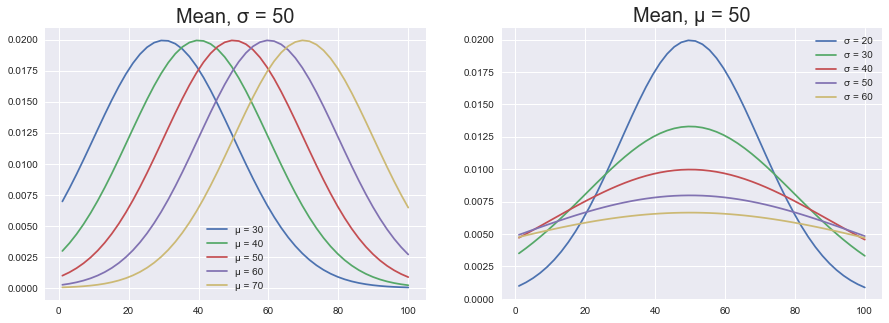

In [323]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15,5))
x_values = np.linspace(1,100)

# Vary μ
ax[0].set_title('Mean, σ = 50', fontsize=20)
for mu in [30,40,50,60,70]:
    ax[0].plot(x_values, normal(x_values, mu=mu, sigma=20), label=f'μ = {mu}')
ax[0].legend()

# Vary σ
ax[1].set_title('Mean, μ = 50', fontsize=20)
for sigma in [20,30,40,50,60]:
    ax[1].plot(x_values, normal(x_values, mu=50, sigma=sigma), label=f'σ = {sigma}')
ax[1].legend()

### 2.10 - Fitting the Normal Distribution to the Heights and Weights Data

Talk about normalising the histograms, and how this now gives us the probability


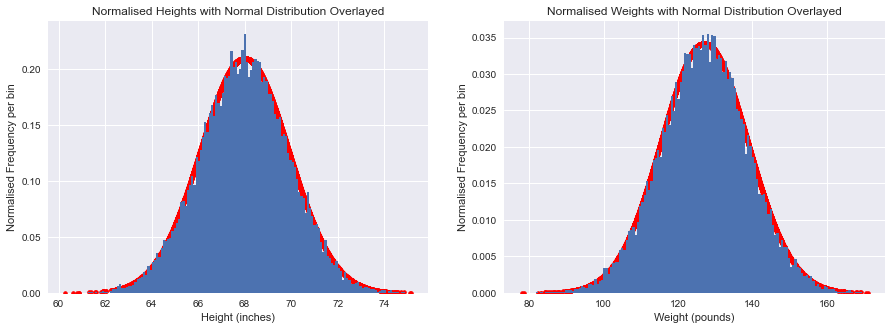

In [284]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax[0].set_title('Normalised Heights with Normal Distribution Overlayed')
ax[0].set_xlabel('Height (inches)')
ax[0].set_ylabel('Normalised Frequency per bin')
ax[0].hist(heights, bins=np.linspace(61,75,150), density=True)
ax[0].scatter(heights, normal(heights), color='red', marker='.', linewidth=1)


ax[1].set_title('Normalised Weights with Normal Distribution Overlayed')
ax[1].set_xlabel('Weight (pounds)')
ax[1].set_ylabel('Normalised Frequency per bin')
ax[1].hist(weights, bins=np.linspace(80,170,150),density=True)
ax[1].scatter(weights, normal(weights), color='red', marker='.', linewidth=1)

### 2.11 - Calculating Probabilities using the Normal Distribution Curve

Because it gives the probabilities, its called a Probability Density Function

<center><h2>Section 3 - Analysing Samples of the Data</h2></center>

### 3.1 - Why Analysing Sample Data is Important

In real-life experiments, it is very rare to have all the data for an entire population. Gathering this much data can be time and resource intensive, if not impossible. For that reason, experiments gather a sample of the data. So far this notebook has treated the data of the 25,000 individuals as a complete dataset, but it itself is just a sample of people out of the entire population of 18 year olds on Earth. 

Since most experimentation and statistical analysis is conducted on samples, it is important to understand the differences when working with this kind of data.

### 3.2 - Taking a Sample of the Dataset

To visualise working a with a sample, 1000 random values will be taken from the dataset. This will form the sample in this notebook. Plotting the values shows a less clear normal distribution, which is expected since there are fewer data points to 'average' out to a smooth distribution.

In [157]:
sample_heights = np.random.choice(heights,1000)
sample_weights = np.random.choice(weights,1000)

Text(0, 0.5, 'Frequency per bin')

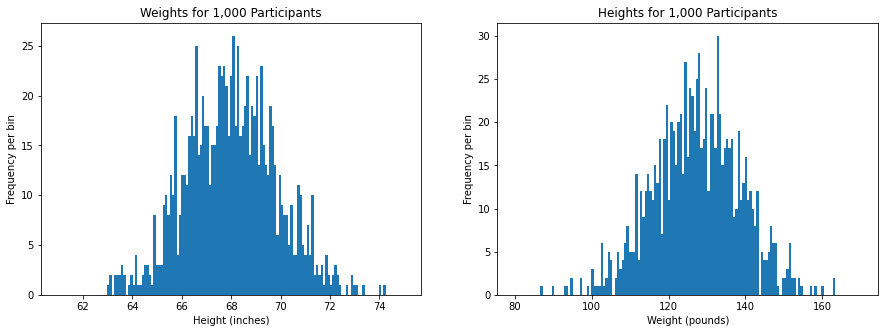

In [167]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax[0].set_title('Weights for 1,000 Participants')
ax[0].hist(sample_heights, bins=np.linspace(61,75,150))
ax[0].set_xlabel('Height (inches)')
ax[0].set_ylabel('Frequency per bin')

ax[1].set_title('Heights for 1,000 Participants')
ax[1].hist(sample_weights, bins=np.linspace(80,170,150))
ax[1].set_xlabel('Weight (pounds)')
ax[1].set_ylabel('Frequency per bin')

### 3.3 - Calculate the Sample Mean

The sample mean is an estimate for the population mean, based on the data we have. This might only be a small sample, so the sample mean could be quite different to the actual population mean. The more data we have, the more confident we can be that the sample mean is representative of the population mean.

To find the sample mean, simply add each of the sample values together and divide by the number of sample values. This is exactly the same as the formula for the population mean (and so the Python implementation will not be re-written). The key difference here though is the notation.

To distinguish between population mean and sample mean, and population size and sample size, a couple of notation changes are made:

$
\bar{x} = \frac{\sum  \limits _{i=1}^{n} x_i}{n}
$

where $\bar{x}$ is the sample mean and $n$ is the sample size

In [169]:
x_bar_heights = mean(sample_heights)
x_bar_weights = mean(sample_weights)

print(f'Mean sample height: {x_bar_heights:.2f} inches')
print(f'This is different from the population mean by {abs(x_bar_heights-mu_heights):.2f} inches')
print(f'Mean sample weight: {x_bar_weights:.2f} pounds')
print(f'This is different from the population mean by {abs(x_bar_weights-mu_weights):.2f} pounds')

Mean sample height: 68.00 inches
This is different from the population mean by 0.01 inches
Mean sample weight: 127.26 pounds
This is different from the population mean by 0.18 pounds


### 3.4 - Calculating the Sample Variance

Different because n-1

### 3.5 - Why the Sample Variance Always Underestimates the Population Variance 

### 3.6 Bessel's Correction

<center><h2>Section ? - References</h2></center>

[1] Dataset background and download - [Kaggle](https://www.kaggle.com/burnoutminer/heights-and-weights-dataset/version/1)

[2] Calculating variance with the absolute differences - [Stephen Gorard](https://emilkirkegaard.dk/en/wp-content/uploads/Revisiting-a-90-year-old-debate-the-advantages-of-the-mean-deviation.pdf)

[3] Derivation of the Normal Distribution Equation - [YouTube](https://www.youtube.com/watch?v=cTyPuZ9-JZ0)